# 필수 라이브러리

In [193]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import collections
import mglearn
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings(action='ignore') 

random.seed(2020)
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

# 1) 데이터 셋 소개

In [194]:
# 데이터 로드
df = pd.read_csv('Dry_Bean_Dataset.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [195]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [196]:
print("데이터 셋의 관측치 수와 Class 수는 아래와 같다.")
print("Dry Bean :",np.shape(df)[0],"/ Class : ", df['Class'].nunique())

데이터 셋의 관측치 수와 Class 수는 아래와 같다.
Dry Bean : 13611 / Class :  7


# 2) 전처리

##  2-1) 범주형 변수에 대한 처리

In [197]:
Label = df['Class'].to_frame()
df.drop(['Class'], axis=1, inplace=True)

In [198]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Label['Class'] = encoder.fit_transform(Label['Class'].values)

## 2-2) Scailing

In [199]:
# 표준화, 정규화
col_names = df.columns
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
df_standard = scaler_std.fit_transform(df)

from sklearn.preprocessing import MinMaxScaler
scaler_nor = MinMaxScaler()
norm_array = scaler_nor.fit_transform(df)
df_norm = pd.DataFrame(norm_array, columns=col_names)

df_norm

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967316,0.884987,0.974979
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.160862,0.189318,0.187843,0.375584,0.788553,0.089967,0.172180,0.512286,0.942381,0.852151,0.465175,0.531785,0.382135,0.412185,0.974113
13607,0.092576,0.159358,0.176450,0.201964,0.321303,0.746241,0.089910,0.172207,0.786890,0.947954,0.862952,0.523974,0.509582,0.426233,0.470848,0.970912
13608,0.092739,0.160605,0.176384,0.203370,0.318558,0.743877,0.090219,0.172463,0.561689,0.936648,0.855785,0.525351,0.508683,0.427019,0.472240,0.943025
13609,0.092773,0.163657,0.179703,0.200669,0.330472,0.753971,0.090623,0.172517,0.482741,0.908991,0.834795,0.510145,0.514216,0.415330,0.456919,0.913342


## 2-3) 독립변수들간 상관성 분석

<AxesSubplot:>

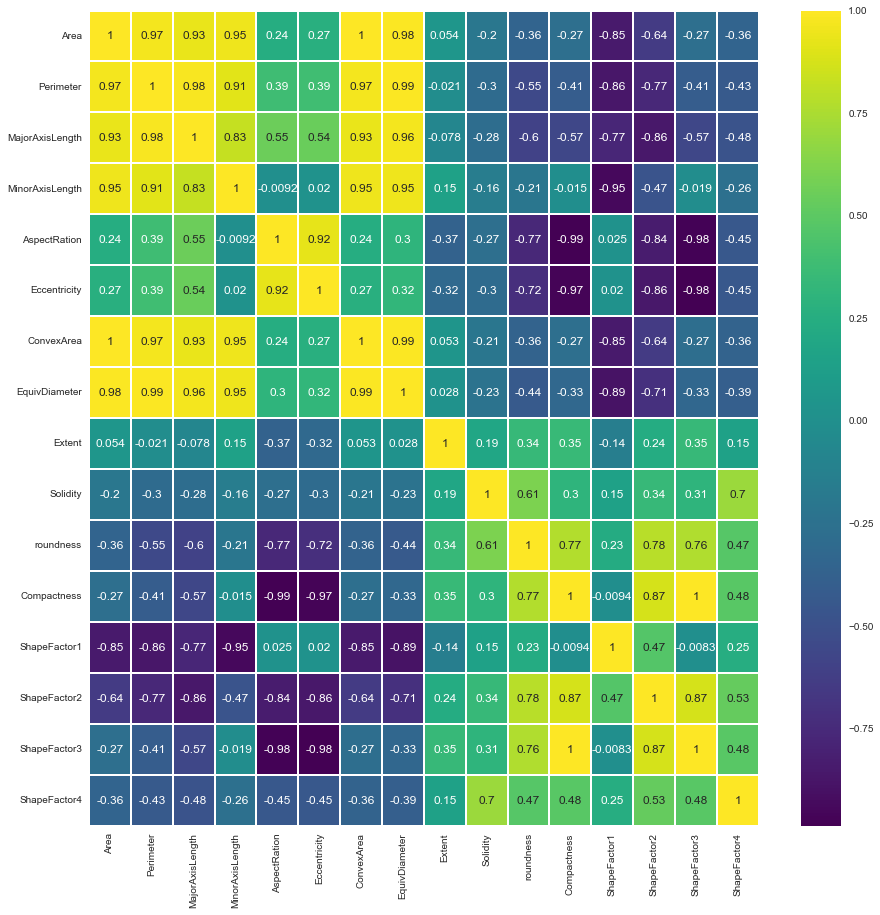

In [200]:
corr = df_norm.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1, annot=True)

- Area와 Convex Area 중 1개 제거
- Compactness와 ShapeFactor3 중 1개 제거

In [201]:
df_norm.drop(['ConvexArea', 'ShapeFactor3'], axis=1, inplace=True)

In [202]:
# df_norm = df_norm.drop( ['CAEC_Sometimes', 'CAEC_Sometimes', 'MTRANS_Automobile'], axis = 1)

## 2-4) PCA

In [214]:
# 차원 축소
pca = PCA(n_components=3)
pca.fit(df_norm)
pca_array = pca.transform(df_norm)
df_pca = pd.DataFrame(pca_array)
df_pca = df_pca.rename(columns={0:'P1', 1:'P2', 2:'P3'})
df_pca

,P1,P2,P3
0,-0.759084,0.192877,0.079459
1,-0.883743,0.362877,0.103150
2,-0.720518,0.198503,0.030348
3,-0.745542,0.276044,0.067828
4,-0.982273,0.472887,0.156929
...,...,...,...
13606,-0.112706,-0.092588,0.087711
13607,-0.202975,0.053085,-0.145408
13608,-0.180033,-0.004420,0.071173
13609,-0.146816,-0.046207,0.142072


In [212]:
df_test = pd.concat([df_pca, Label],axis=1)
df_test

,P1,P2,2,Class
0,-0.759084,0.192877,0.079459,5
1,-0.883743,0.362877,0.103150,5
2,-0.720518,0.198503,0.030348,5
3,-0.745542,0.276044,0.067828,5
4,-0.982273,0.472887,0.156929,5
...,...,...,...,...
13606,-0.112706,-0.092588,0.087711,3
13607,-0.202975,0.053085,-0.145408,3
13608,-0.180033,-0.004420,0.071173,3
13609,-0.146816,-0.046207,0.142072,3


In [205]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(6,6))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
# ax.scatter(df_pca['P1'],df_pca['P2'],df_pca['P3'],alpha=0.5)
# ax.set_xlabel('P1')
# ax.set_ylabel('P2')
# ax.set_zlabel('P2')
# plt.show()
# sns.scatterplot(x="P1", y="P2", z='P3', data=df_pca, palette="Set2");

# 3) 군집화 분석

## 3-1) K-Means

In [206]:
# K-means 모델링 / Scatter plot 함수 구현
def k_Means_Plot(Data, Select_k, NAME, Init_Method = 'k-means++', Num_Init=10):
    Data2 = Data[['P1', 'P2']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        Kmeans_Clustering = KMeans(n_clusters=i, init=Init_Method, random_state=2020, n_init=Num_Init)
        Kmeans_Clustering.fit(Data2)
        mglearn.discrete_scatter(Data2['P1'], Data2['P2'], Kmeans_Clustering.labels_, ax=axes[i - 4], s=5)
        mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0], 
                                 Kmeans_Clustering.cluster_centers_[:, 1],
                                 list(range(i)), 
                                 markeredgewidth=3, 
                                 ax=axes[i - 4], s=10)
        Score = np.round(silhouette_score(Data2, Kmeans_Clustering.labels_),3)
        axes[i - 4].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))

<AxesSubplot:xlabel='P1', ylabel='P2'>

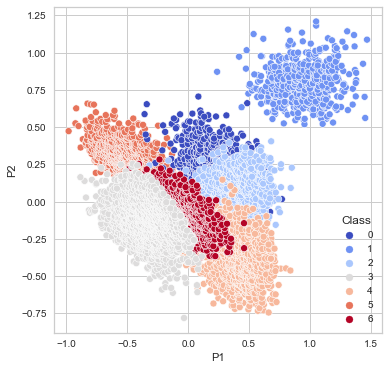

In [207]:
plt.figure(figsize=(20, 6))
plt.subplot(132)
sns.scatterplot(x=df_test['P1'], y=df_test['P2'], data=df_test, hue=df_test['Class'], palette='coolwarm')

적절한 군집수 찾기
Inertia(군집 내 거리제곱합의 합) value (적정 군집수)
손실함수로 결정하는 것이 아니다. 정성적인 부분으로 어느 지점이 좋다고 단정지어 평가할 수 없다.
더이상 크게 내려가지 않는 지점을 찾자!
kmeans는 sphere에 특화된 알고리즘


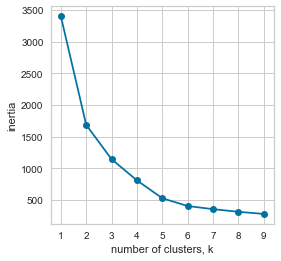

In [208]:
inertias = []

for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

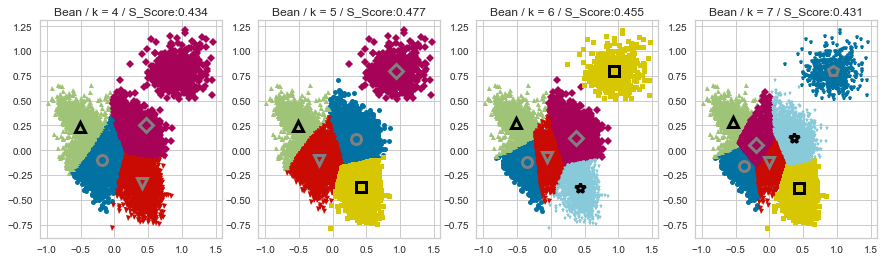

In [89]:
k_Means_Plot(Data = df_pca, Select_k = range(4,8), NAME='Bean', Init_Method = 'random', Num_Init=1)

k=3에서 실루엣 스코어가 제일 높다. 그라운드 트루스는 실제레이블을 의미.
실루엣 스코어가 가장 높다고 해서 좋은 군집화다라고 할 수는 없다. 정성적인 평가가 중요하다.
n_init을 30으로 둬도 1일때랑 같은 것을 보니, sample의 수가 그리 많지 않아서 한번의 독립시행만으로도 괜찮은 실루엣 스코어를 받았다고 판단할 수 있다.

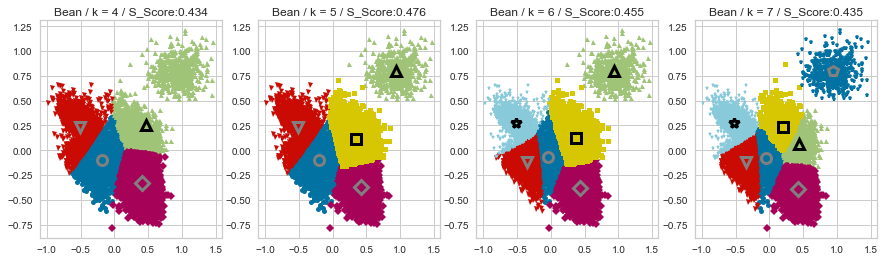

In [90]:
k_Means_Plot(Data = df_pca, Select_k = range(4,8), NAME='Bean', Init_Method = 'k-means++', Num_Init=1)

sample의 수가 많은 데이터에 k-means++를 적용시키면 random하게 초기 데이터 포인트를 잡지 않고, 실제 있는 데이터포인트를 잡아서 Num_init을 작게 잡아도 충분한 효과를 볼 수 있따.

init 메소드와 num_init 이 두가지의 하이퍼파라미터를 변경해가면서 최적의 하이퍼 파라미터를 찾는것이 필요하다.

# Herarchical clustering

<AxesSubplot:xlabel='P1', ylabel='P2'>

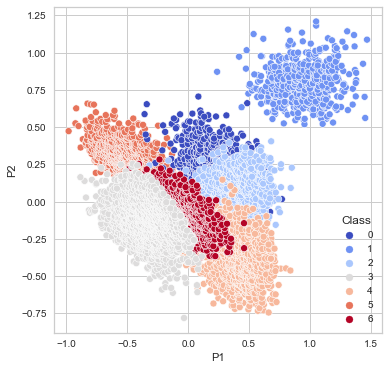

In [91]:
plt.figure(figsize=(20, 6))
plt.subplot(132)
sns.scatterplot(x=df_test['P1'], y=df_test['P2'], data=df_test, hue=df_test['Class'], palette='coolwarm')

In [92]:
def Fixed_Dendrogram(Data, Num_of_p, Full_Use):
    Linkage_Matrix = linkage(Data,'complete')
    if(Full_Use == True):
        Num_of_p = np.shape(Data)[0]
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
    else:
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Linkage_Matrix,
        truncate_mode = 'lastp',  
        p = Num_of_p, 
        leaf_rotation = 90.,
        leaf_font_size = 12.,
        color_threshold = 'default'
    )
    plt.show()

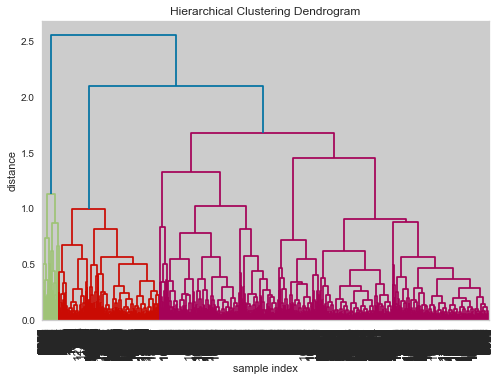

In [93]:
# 모든 리프노드에 대한 dendrogram 생성
Fixed_Dendrogram(df_pca[['P1','P2']], -1, True) # -1: nomeaningful value

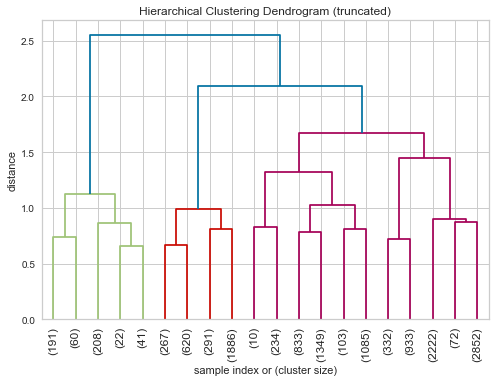

In [120]:
a = Fixed_Dendrogram(df_pca[['P1','P2']], 20, False)

트레쉬홀드를 정할 수 있어야함

In [127]:
def Hclust_Plot(Data,Select_k,NAME):
    Data2 = Data[['P1', 'P2']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters=i,linkage="ward")
        P_Labels = H_Clustering.fit_predict(Data2)
        mglearn.discrete_scatter(Data2['P1'], Data2['P2'], P_Labels, ax=axes[i - 4], s=5)        
        axes[i - 4].set_title("Data:" + NAME + ' / k = ' + str(i))
        Score=np.round(silhouette_score(Data2,P_Labels),3)
        axes[i - 4].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))

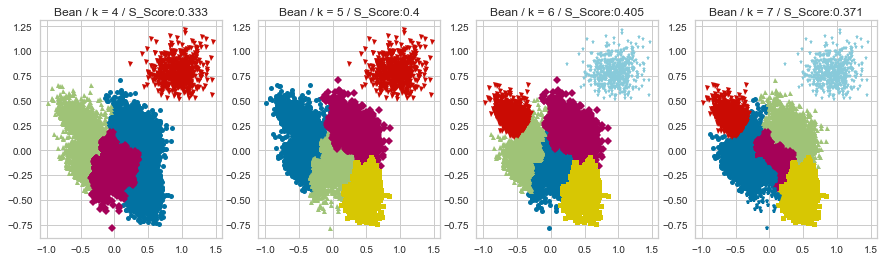

In [128]:
Hclust_Plot(df_pca, range(4, 8), 'Bean')

# DBSCAN clustering

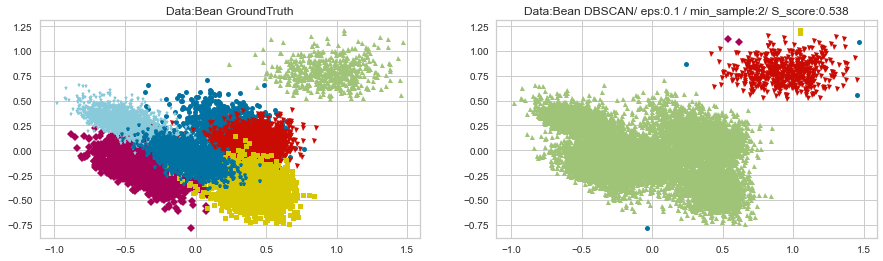

In [176]:
def DBSCAN_Plot(Data,NAME,min_samples=2,eps=0.1):
    Data2 = Data[['P1', 'P2']]
    Append_k_Means_Results = list()
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    Set_DBSCAN_Hyperparameter=DBSCAN(min_samples=min_samples,eps=eps)
     
    Results = Set_DBSCAN_Hyperparameter.fit_predict(Data2)
    Score=np.round(silhouette_score(Data2,Results),3)
    
    mglearn.discrete_scatter(Data2['P1'], Data2['P2'], Data['Class'], ax=axes[0], s=5)
    axes[0].set_title("Data:" + NAME + ' GroundTruth') 
    
    mglearn.discrete_scatter(Data2['P1'], Data2['P2'], Results, ax=axes[1], s=5)
    axes[1].set_title("Data:" + NAME + ' DBSCAN/ eps:'+str(eps)+' / min_sample:'+str(min_samples)+'/ S_score:'+str(Score))


DBSCAN_Plot(Data=df_test, NAME="Bean")

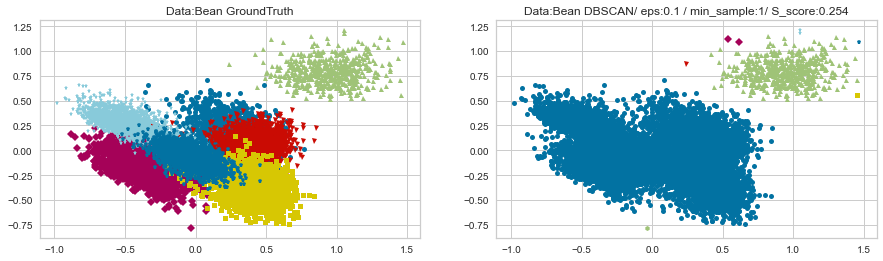

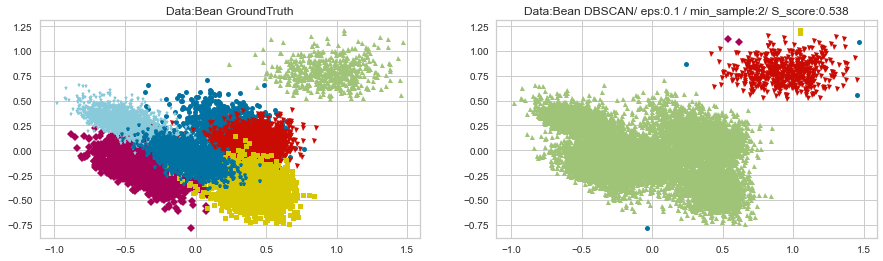

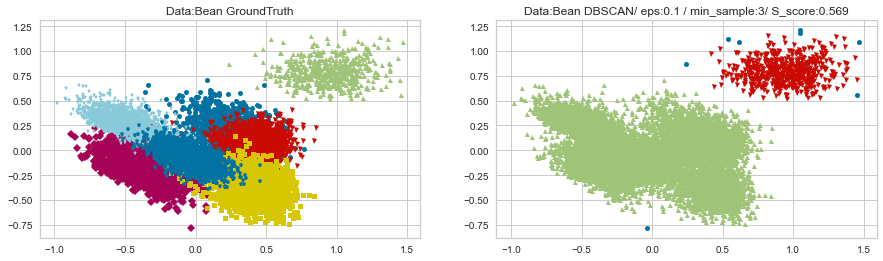

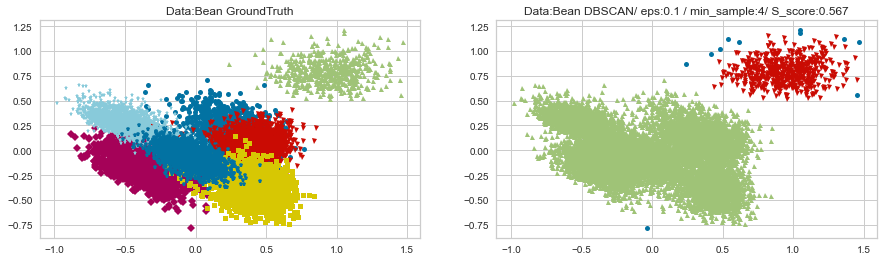

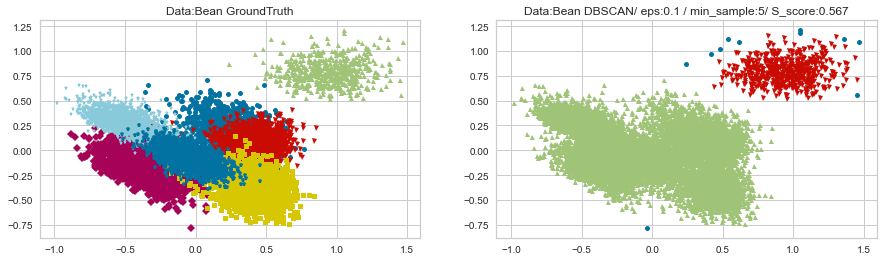

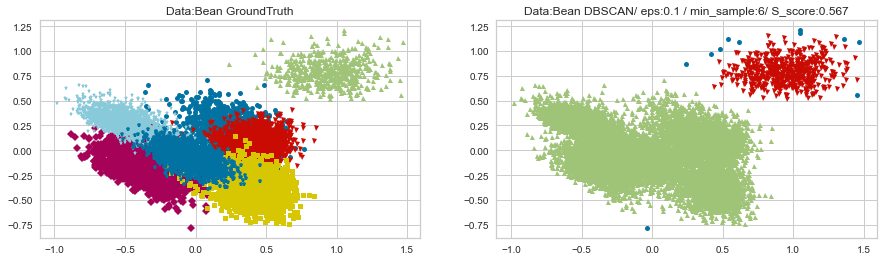

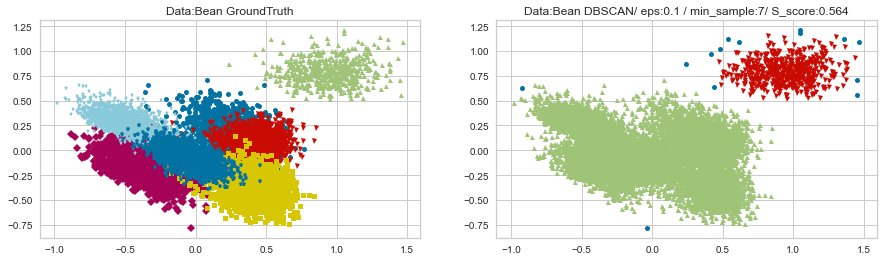

In [185]:
DBSCAN_Plot(Data=df_test,NAME="Bean",min_samples=1,eps=0.1)
DBSCAN_Plot(Data=df_test,NAME="Bean",min_samples=2,eps=0.1)
DBSCAN_Plot(Data=df_test,NAME="Bean",min_samples=3,eps=0.1)
DBSCAN_Plot(Data=df_test,NAME="Bean",min_samples=4,eps=0.1)
DBSCAN_Plot(Data=df_test,NAME="Bean",min_samples=5,eps=0.1)

Hyperparameters: [ e: 0.03 , n: 3 ]


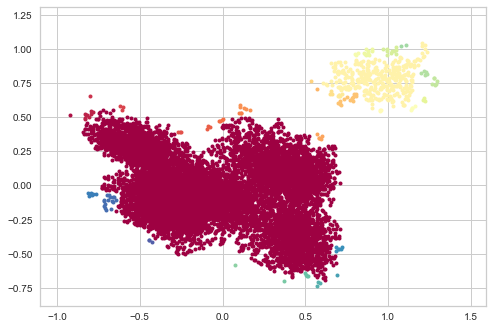

Hyperparameters: [ e: 0.06 , n: 3 ]


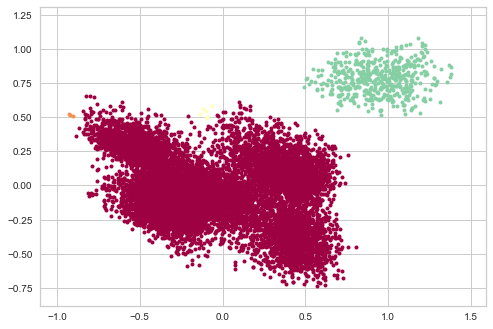

Hyperparameters: [ e: 0.09 , n: 3 ]


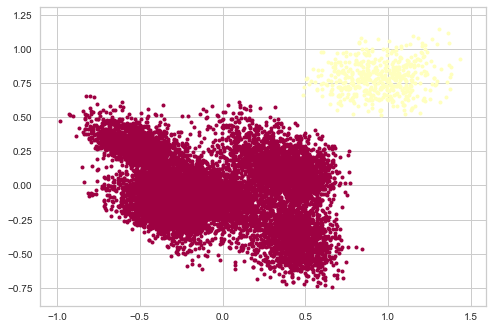

Hyperparameters: [ e: 0.12 , n: 3 ]


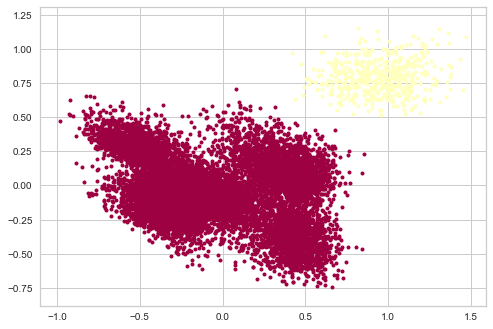

Hyperparameters: [ e: 0.15 , n: 3 ]


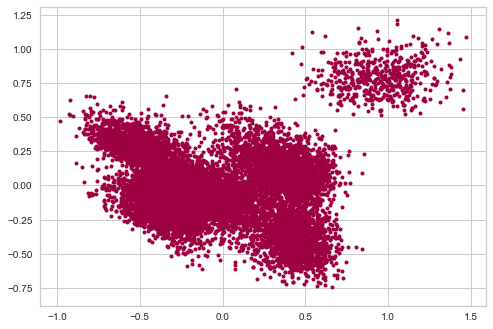

Hyperparameters: [ e: 0.18 , n: 3 ]


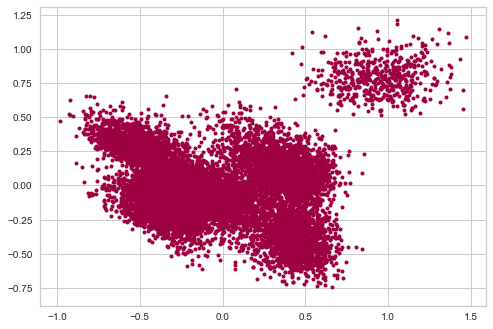

In [186]:
for i in range(1,7):
    
    # DBSCAN 하이퍼 파라미터 설정
    epsilon = round(i * 0.03, 10)
    no_of_sample = 3

    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")

    try:
        db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(df_pca)
        core_mask = np.zeros_like(db.labels_, dtype = bool)
        core_mask[db.core_sample_indices_] = True
        labels = db.labels_

        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Silhouette score: %0.3f" % metrics.silhouette_score(df_pca, labels))
    except:
        pass
        
    unique_labels = set(labels) # 유일 label 추출
    colors = [plt.cm.Spectral(each) # 각 label 별 색 추출
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors): # index, 색정보 반복
        if k == -1:
            col = [0, 0, 0, 1] # black
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = df_pca[class_member_mask & core_mask]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = df_pca[class_member_mask & ~core_mask]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()

k-means

k-means++

In [209]:
from mpl_toolkits.mplot3d import Axes3D

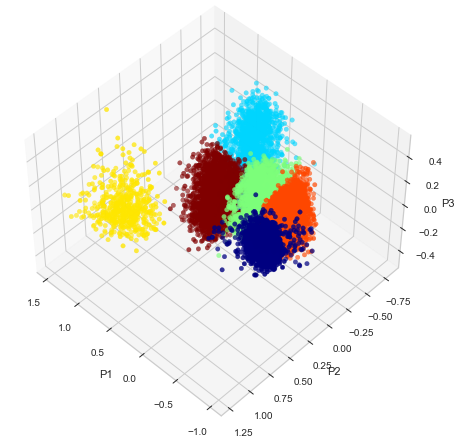

In [217]:
# 초기 중심점 설정, 그룹 수, random_state 설정
k=7
model = KMeans(init='k-means++', n_clusters = k, random_state=42)

# 학습
kmeans_plus = model.fit(df_pca)

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df_pca['P1'],df_pca['P2'],df_pca['P3'],c=kmeans_plus.labels_, cmap='jet')
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')
plt.show()

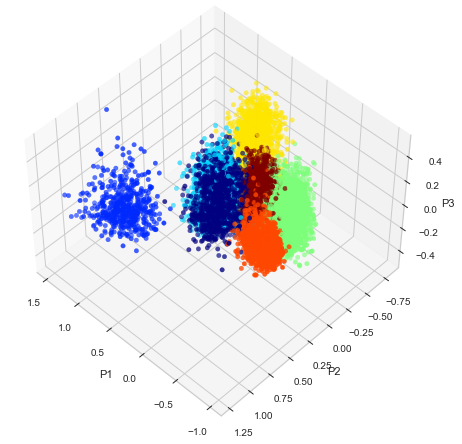

In [216]:
#label : 전처리과정에서 제거한 레이블 복사해뒀던거

df_test = pd.concat([df_pca, Label],axis=1)
df_test


fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df_test['P1'],df_test['P2'],df_test['P3'], c=df_test['Class'], cmap='jet')
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')
plt.show()

결과 : 좆같다

# Hierarchical clustering

In [165]:
# 차원 축소
pca = PCA(n_components=2)
pca.fit(df_norm)
pca_array = pca.transform(df_norm)
df_pca = pd.DataFrame(pca_array)
df_pca = df_pca.rename(columns={0:'P1', 1:'P2'})
df_pca

,P1,P2
0,-0.488436,-0.014208
1,-0.523818,-0.195484
2,-0.820830,-0.589834
3,-0.205319,-0.062088
4,-0.608420,-0.494779
...,...,...
172,0.739947,-0.466530
173,0.580504,-0.344970
174,0.627673,-0.542329
175,0.573600,-0.421245


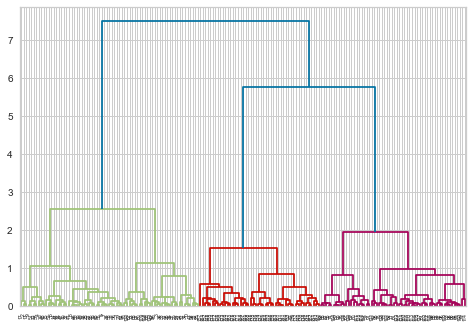

In [166]:
# mergings = linkage(df_norm,method='complete')

# plt.figure(figsize=(40,20))
# dendrogram(mergings,
#            truncate_mode = 'lastp',
#            p=16,
#            leaf_rotation=90,
#            leaf_font_size=20,
#            color_threshold = 'default'
# )
# plt.show()

import scipy.cluster.hierarchy as shc
# plt.figure(figsize=(10, 7))
# plt.title("Dendograms")
Dendrogram = shc.dendrogram((shc.linkage(df_pca, method='ward')))


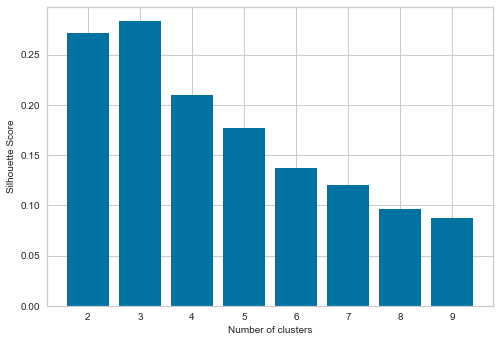

In [168]:
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(df_norm, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df_pca))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [169]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(df_pca)

AgglomerativeClustering(n_clusters=3)

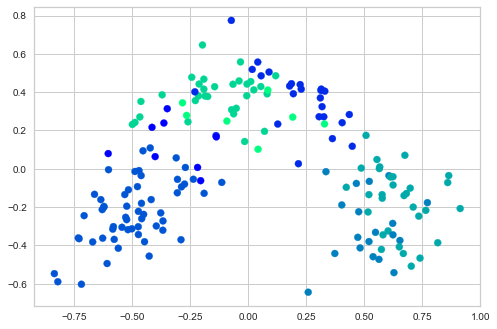

In [170]:
# Visualizing the clustering 
plt.scatter(df_pca['P1'], df_pca['P2'],  
           c = AgglomerativeClustering(n_clusters = 7).fit_predict(df_norm), cmap =plt.cm.winter) 
plt.show() 

<AxesSubplot:xlabel='P1', ylabel='P2'>

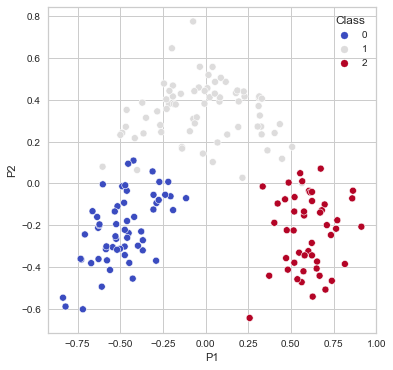

In [171]:
df_test = pd.concat([df_pca, Label],axis=1)
df_test


plt.figure(figsize=(20, 6))
plt.subplot(132)
sns.scatterplot(x=df_true['P1'], y=df_true['P2'], data=df_test, hue=df_test['Class'], palette='coolwarm')